In [7]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

<!-- <img src="./figs/best_random_32.gif" alt="Best of Random Searches (32 Cities" style="width: 600px;"/> -->

In [119]:
# N = 100
# ./figs/best_random_32.gif

# for i in range(N):
#     plot_tsp(best_paths, i, x, y)
#     plt.text(12, 12, str(i+1), fontsize="large")
#     plt.title("Best of Random Search with 32 Cities")
#     filename = "./figs/path_" + str(i) + ".png"
#     plt.savefig(filename, dpi=200)
#     plt.close()

In [8]:
def tsp_on_circle(path, x, y, radius, ax=None, draw=True):
    
    if ax is None:
        ax = plt.gca() 
        
    if (draw==True): # Draw the circle
        circle = plt.Circle((0, 0), radius) 
        circle.set_fill(False)
        ax.add_patch(circle)
        
    # Plot cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300") # Starting city
    
    # Grid and limits
    ax.grid(True)
    lim = radius*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])
    
    # Plot each leg of the TSP
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
        
    return ax

def plot_cost(igen, best, average, ax=None):
    if ax is None:
        ax = plt.gca()
    
    ax.plot(igen, best, label='Best Path')
    ax.plot(igen, average, label='Best Half')
    ax.legend()
    ax.grid(True)
    
    return ax;

def draw_path(p1, p2, ax): 
    '''Draw a line between two points'''
    point1 = [1, 2]
    point2 = [3, 4]

    x_values = [p1[0], p2[0]]
    y_values = [p1[1], p2[1]]
    ax.plot(x_values, y_values, color="#343f56")

### Part 1 - The Traveling Salesman on a Circumference

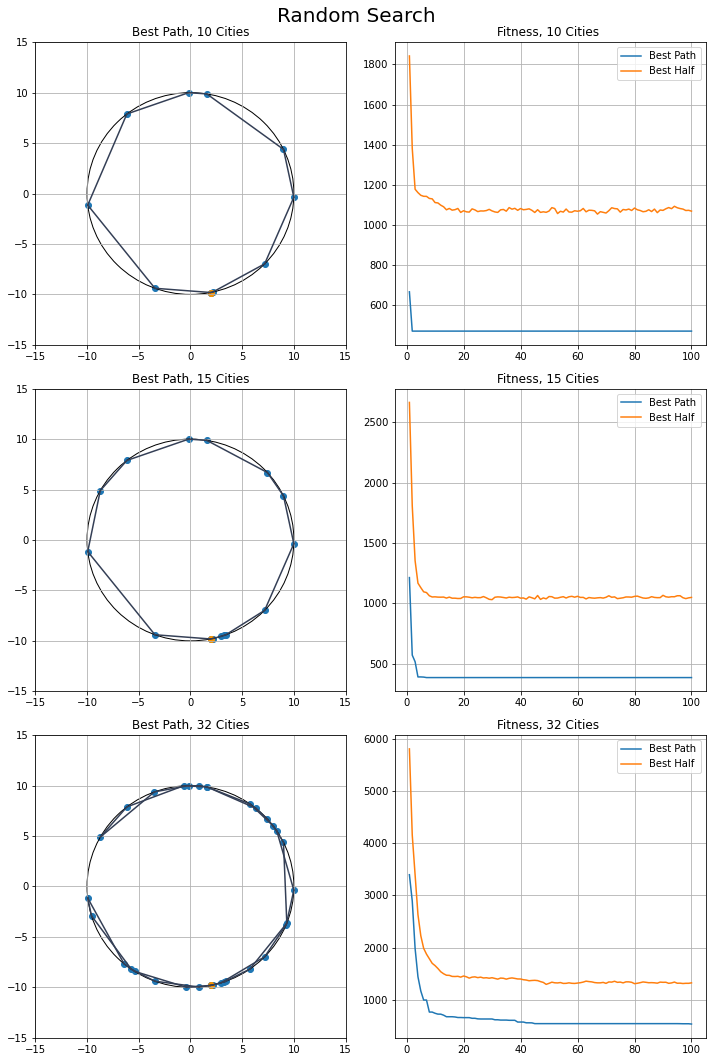

In [11]:
# Plot Random Search

# Load data :

city_file = "./data/randomsearch/circle_10/cities.dat"
bp_file = "./data/randomsearch/circle_10/best_path.dat"
avg_file = "./data/randomsearch/circle_10/avg_cost.dat"
lc_file = "./data/randomsearch/circle_10/least_cost.dat"

# City coordinates
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
# Best paths of each generation and their cost
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
# Average cost of top 50% of each generation
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)


fig, ax = plt.subplots(3, 2, figsize=(10,15))
plt.suptitle("Random Search", fontsize=20)

ax[0,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,0])
ax[0,0].title.set_text("Best Path, 10 Cities")
ax[0,1] = plot_cost(gen, least_cost, avg_cost, ax[0,1])
ax[0,1].title.set_text("Fitness, 10 Cities ")

city_file = "./data/randomsearch/circle_15/cities.dat"
bp_file = "./data/randomsearch/circle_15/best_path.dat"
avg_file = "./data/randomsearch/circle_15/avg_cost.dat"
lc_file = "./data/randomsearch/circle_15/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[1,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,0])
ax[1,0].title.set_text("Best Path, 15 Cities")
ax[1,1] = plot_cost(gen, least_cost, avg_cost, ax[1,1])
ax[1,1].title.set_text("Fitness, 15 Cities ")

city_file = "./data/randomsearch/circle_32/cities.dat"
bp_file = "./data/randomsearch/circle_32/best_path.dat"
avg_file = "./data/randomsearch/circle_32/avg_cost.dat"
lc_file = "./data/randomsearch/circle_32/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[2,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,0])
ax[2,0].title.set_text("Best Path, 32 Cities")
ax[2,1] = plot_cost(gen, least_cost, avg_cost, ax[2,1])
ax[2,1].title.set_text("Fitness, 32 Cities ")
plt.tight_layout()

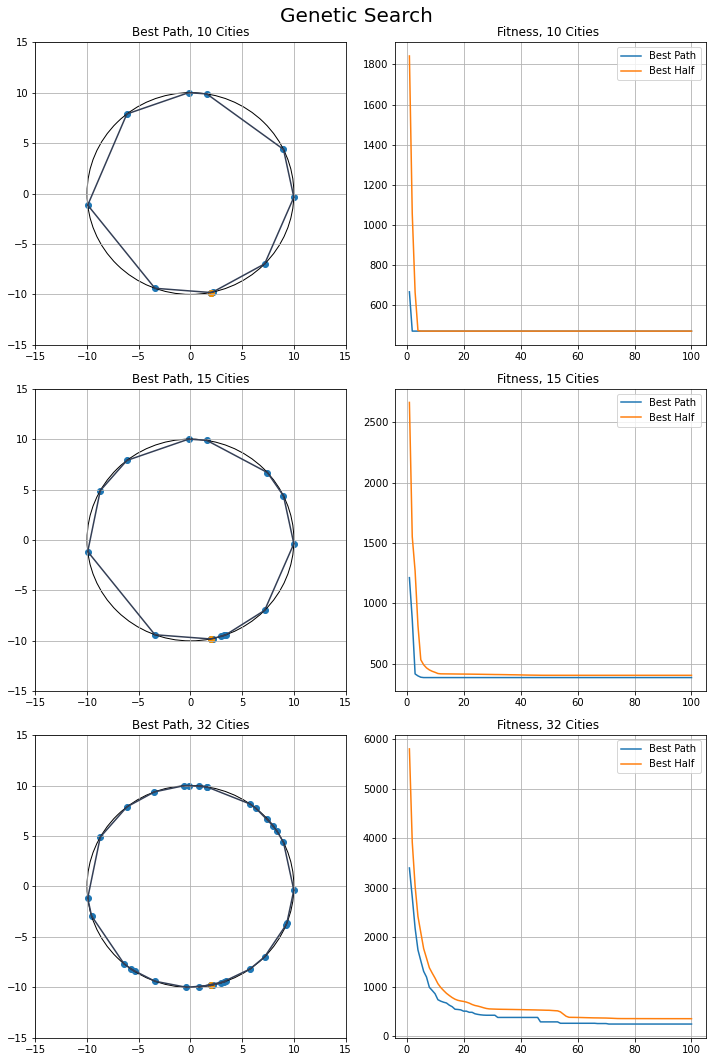

In [13]:
# Plot Genetic Search

fig, ax = plt.subplots(3, 2, figsize=(10,15))
plt.suptitle("Genetic Search", fontsize=20)

city_file = "./data/geneticsearch/circle_10/cities.dat"
bp_file = "./data/geneticsearch/circle_10/best_path.dat"
avg_file = "./data/geneticsearch/circle_10/avg_cost.dat"
lc_file = "./data/geneticsearch/circle_10/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[0,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,0])
ax[0,0].title.set_text("Best Path, 10 Cities")
ax[0,1] = plot_cost(gen, least_cost, avg_cost, ax[0,1])
ax[0,1].title.set_text("Fitness, 10 Cities ")

city_file = "./data/geneticsearch/circle_15/cities.dat"
bp_file = "./data/geneticsearch/circle_15/best_path.dat"
avg_file = "./data/geneticsearch/circle_15/avg_cost.dat"
lc_file = "./data/geneticsearch/circle_15/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[1,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,0])
ax[1,0].title.set_text("Best Path, 15 Cities")
ax[1,1] = plot_cost(gen, least_cost, avg_cost, ax[1,1])
ax[1,1].title.set_text("Fitness, 15 Cities ")

city_file = "./data/geneticsearch/circle_32/cities.dat"
bp_file = "./data/geneticsearch/circle_32/best_path.dat"
avg_file = "./data/geneticsearch/circle_32/avg_cost.dat"
lc_file = "./data/geneticsearch/circle_32/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

ax[2,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,0])
ax[2,0].title.set_text("Best Path, 32 Cities")
ax[2,1] = plot_cost(gen, least_cost, avg_cost, ax[2,1])
ax[2,1].title.set_text("Fitness, 32 Cities ")
plt.tight_layout()

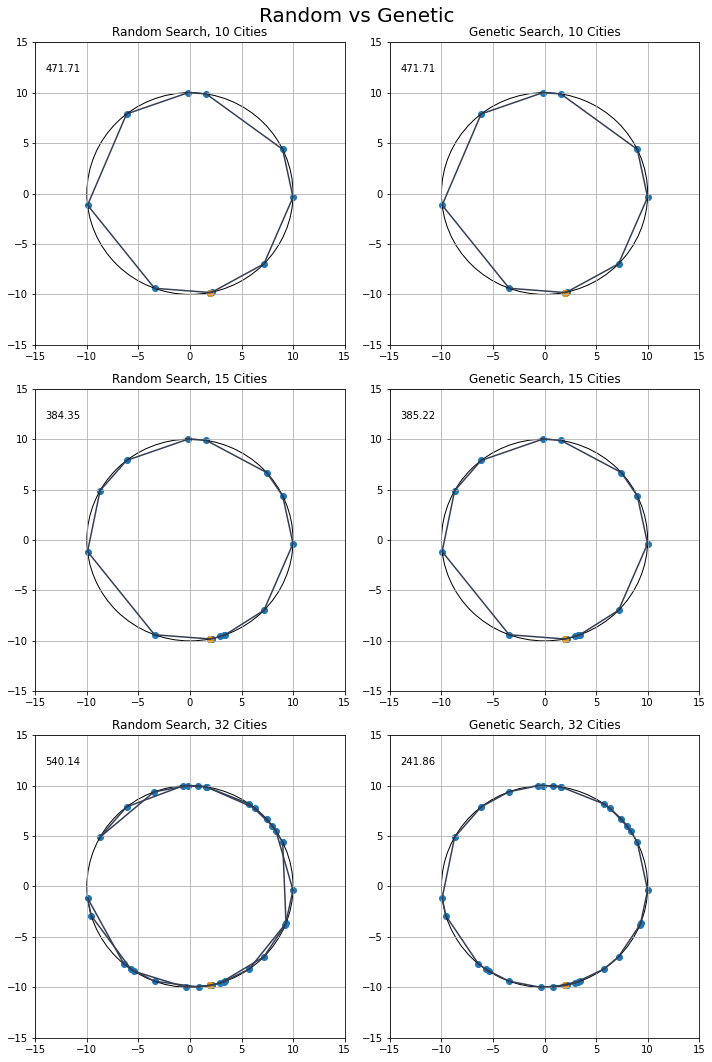

In [17]:
# Plot Genetic vs Random Search

fig, ax = plt.subplots(3, 2, figsize=(10,15))
plt.suptitle("Random vs Genetic", fontsize=20)

# 10 cities
city_file = "./data/randomsearch/circle_10/cities.dat"
bp_file = "./data/randomsearch/circle_10/best_path.dat"
lc_file = "./data/randomsearch/circle_10/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[0,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,0])
ax[0,0].title.set_text("Random Search, 10 Cities")
ax[0,0].text(-14,12, str( round(least_cost[99], 2) ))
   
    
city_file = "./data/geneticsearch/circle_10/cities.dat"
bp_file = "./data/geneticsearch/circle_10/best_path.dat"
lc_file = "./data/geneticsearch/circle_10/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[0,1] = tsp_on_circle(best_paths[99], x, y, 10, ax[0,1])
ax[0,1].title.set_text("Genetic Search, 10 Cities")
ax[0,1].text(-14,12, str( round(least_cost[99], 2) ))

# 15 Cities
city_file = "./data/randomsearch/circle_15/cities.dat"
bp_file = "./data/randomsearch/circle_15/best_path.dat"
lc_file = "./data/randomsearch/circle_15/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[1,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,0])
ax[1,0].title.set_text("Random Search, 15 Cities")
ax[1,0].text(-14,12, str( round(least_cost[99], 2) ))

city_file = "./data/geneticsearch/circle_15/cities.dat"
bp_file = "./data/geneticsearch/circle_15/best_path.dat"
lc_file = "./data/geneticsearch/circle_15/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[1,1] = tsp_on_circle(best_paths[99], x, y, 10, ax[1,1])
ax[1,1].title.set_text("Genetic Search, 15 Cities")
ax[1,1].text(-14,12, str( round(least_cost[99], 2) ))

# 32 Cities
city_file = "./data/randomsearch/circle_32/cities.dat"
bp_file = "./data/randomsearch/circle_32/best_path.dat"
lc_file = "./data/randomsearch/circle_32/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[2,0] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,0])
ax[2,0].title.set_text("Random Search, 32 Cities")
ax[2,0].text(-14,12, str( round(least_cost[99], 2) ))


city_file = "./data/geneticsearch/circle_32/cities.dat"
bp_file = "./data/geneticsearch/circle_32/best_path.dat"
lc_file = "./data/geneticsearch/circle_32/least_cost.dat"
x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)

ax[2,1] = tsp_on_circle(best_paths[99], x, y, 10, ax[2,1])
ax[2,1].title.set_text("Genetic Search, 32 Cities")
ax[2,1].text(-14,12, str( round(least_cost[99], 2) ))

plt.tight_layout()

### Part 2 - The Traveling Salesman in a Square

In [18]:
def tsp_in_square(path, x, y, side, ax=None, draw=True):
    
    if ax is None:
        ax = plt.gca() 
        
    if (draw==True): # Draw the square
        square = plt.Rectangle((-side,-side), 2*side, 2*side, lw=2, color='#2940d3')
        square.set_fill(False)
        ax.add_patch(square)
        
    # Plot cities
    ax.scatter(x,y)
    ax.scatter(x[0],y[0], color="#fb9300") # Starting city
    
    # Grid and limits
    ax.grid(True)
    lim = side*1.5
    ax.set_xlim([-lim,lim])
    ax.set_ylim([-lim,lim])
    
    # Plot each leg of the TSP
    N = np.size(path)
    for i in range(N):
        if (i==N-1):
            a = int(path[i])
            b = int(path[0])
        else:
            a = int(path[i])
            b = int(path[i+1])
        p1 = [x[a], y[a]]
        p2 = [x[b], y[b]]
        draw_path(p1, p2, ax)
        
    return ax

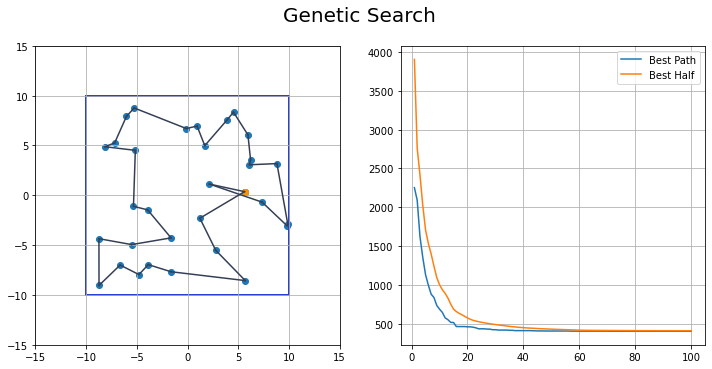

In [19]:
# Genetic Algorithm in Square

city_file = "./data/geneticsearch/square_32/cities.dat"
bp_file = "./data/geneticsearch/square_32/best_path.dat"
avg_file = "./data/geneticsearch/square_32/avg_cost.dat"
lc_file = "./data/geneticsearch/square_32/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5.5))
plt.suptitle("Genetic Search", fontsize=20)
ax[0] = tsp_in_square(best_paths[99], x, y, 10.0, ax[0])
ax[1] = plot_cost(gen, least_cost, avg_cost, ax[1])

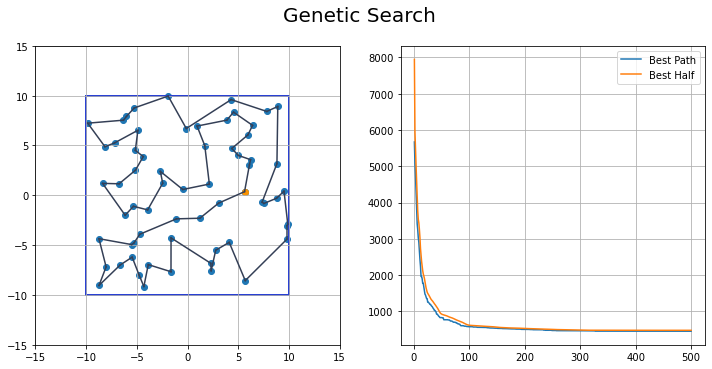

In [23]:
# Genetic Algorithm in Square N = 64, Generations = 500

city_file = "./data/geneticsearch/square_64/cities.dat"
bp_file = "./data/geneticsearch/square_64/best_path.dat"
avg_file = "./data/geneticsearch/square_64/avg_cost.dat"
lc_file = "./data/geneticsearch/square_64/least_cost.dat"

x, y = np.loadtxt(city_file, usecols=(0, 1), unpack=True)
best_paths = np.loadtxt(bp_file)
least_cost = np.loadtxt(lc_file)
gen, avg_cost = np.loadtxt(avg_file, usecols=(0,1), unpack=True)

fig, ax = plt.subplots(1, 2, figsize=(12,5.5))
plt.suptitle("Genetic Search", fontsize=20)
ax[0] = tsp_in_square(best_paths[499], x, y, 10.0, ax[0])
ax[1] = plot_cost(gen, least_cost, avg_cost, ax[1])